# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



from sklearn.preprocessing import StandardScaler , LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load Train & Test Data

In [2]:
train_df=pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\playground-series-s4e10\train.csv')
test_df=pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\playground-series-s4e10\test.csv')

In [3]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [5]:
train_df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
train_df.duplicated().sum()

0

# Now We will Visualize to understanding the data initially

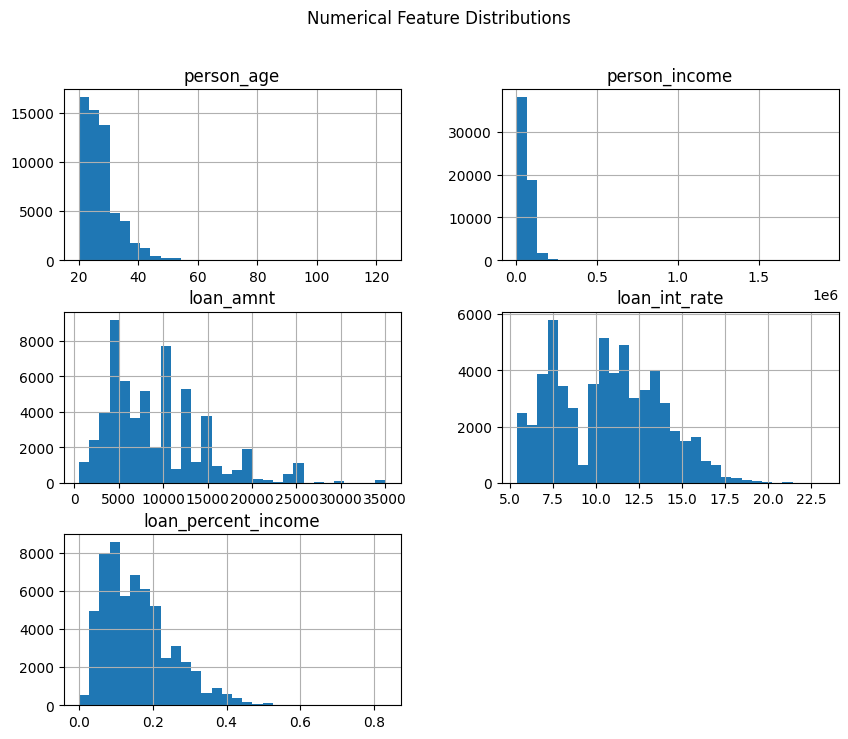

In [7]:
# Numerical feature distributions
numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
train_df[numerical_cols].hist(bins=30, figsize=(10, 8))
plt.suptitle('Numerical Feature Distributions')
plt.show()

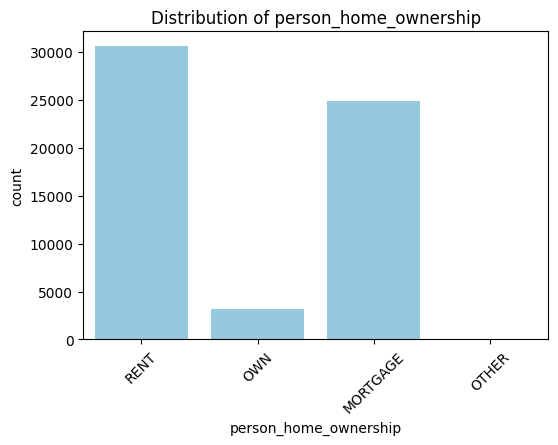

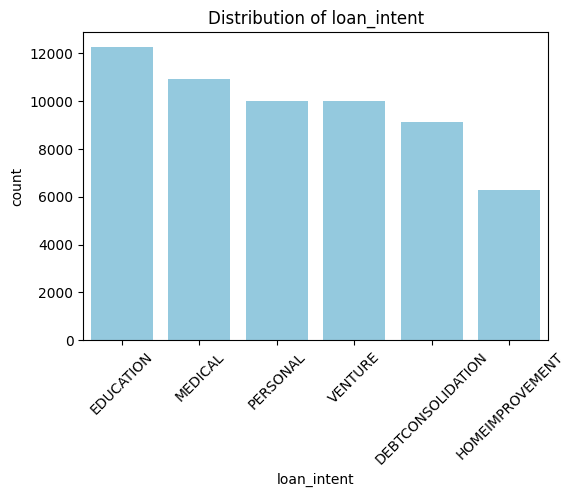

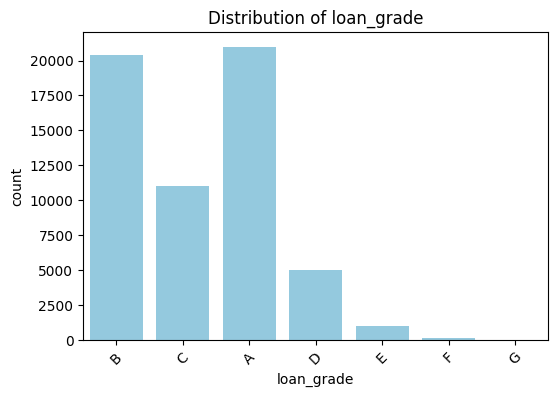

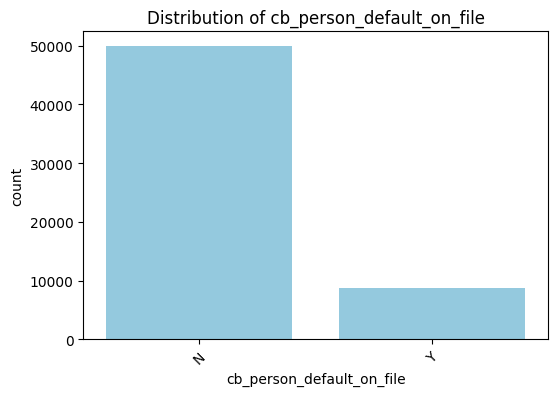

In [8]:
# Categorical feature distributions
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_cols:
    plt.figure(figsize=(6 , 4))
    sns.countplot(data=train_df , x=col , color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
#Encoding Categorical columns
encoder=LabelEncoder()
for col in train_df.select_dtypes(include='object').columns:
    train_df[col]=encoder.fit_transform(train_df[col])

In [10]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


# Now Spliting Data into train & test 

In [11]:
x = train_df.drop(columns=['id' , 'loan_status'] , axis=1)
y = train_df['loan_status']

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , shuffle=True)

In [13]:
#Check
print("X_Test Shape = " , x_test.shape)
print("Y_Test Shape = " , y_test.shape)
print("X_Train Shape = " , x_train.shape)
print("Y_Train Shape = " , y_train.shape)

X_Test Shape =  (11729, 11)
Y_Test Shape =  (11729,)
X_Train Shape =  (46916, 11)
Y_Train Shape =  (46916,)


# Build Classification Modeling

In [14]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}

In [15]:
# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
for i in models :
    obj=models[i]
    obj.fit(x_train , y_train)
    obj_pred = obj.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred)
    recall = recall_score(y_test, obj_pred)
    f1 = f1_score(y_test, obj_pred)
    
    # Store results in the dictionary
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.949442   0.913970  0.705238  0.796150
1          Naive Bayes  0.882343   0.610642  0.440317  0.511677
2  Logistic Regression  0.894194   0.725028  0.393423  0.510067


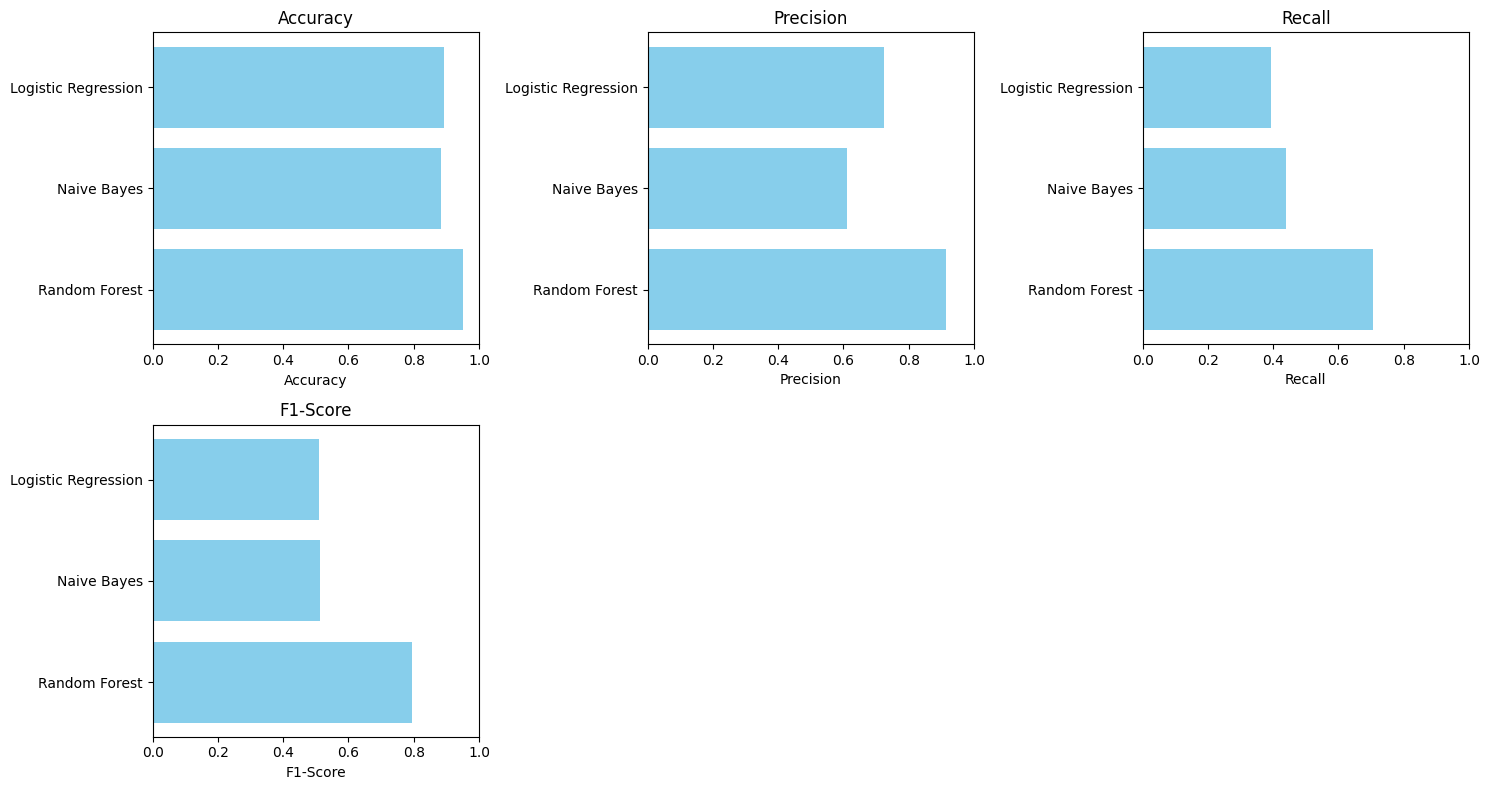

In [16]:
# Plotting each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()


In [17]:
# We will use Random Forest
rf_model=RandomForestClassifier()
rf_model.fit(x_train , y_train)

RandomForestClassifier()

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_rf_model = grid_search.best_estimator_


# Now Using Test DataFrame

In [26]:
# Step 1: Encoding Categorical Columns (Use the same encoder as training)
encoder = LabelEncoder()
for col in test_df.select_dtypes(include='object').columns:
    test_df[col] = encoder.fit_transform(test_df[col])

# Drop unnecessary columns like 'id' if it's not part of your features
X_test = test_df.drop(columns=['id'])

# Step 2: Predicting probabilities with the trained RandomForest model
# Assuming 'rf_model' is already trained and available
test_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Predicting probabilities for loan_status

# Load the sample submission file
submission_df = pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\playground-series-s4e10\sample_submission.csv')

# Fill the 'loan_status' column with the predicted probabilities
submission_df['loan_status'] = test_pred_proba

# Save the final submission file
submission_df.to_csv(r"C:\Users\Ahmed Ashraf\Desktop\submission_df.csv", index=False)
